In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = 'gdrive/MyDrive/deepsf/code_JS/folder_rawdata_processing/'

# Read the data from the file.
with open(path+'3-pipeline_files.pkl', 'rb') as fid:
     result = pickle.load(fid)

TCGA_tpm_gn_RBPs = result['TCGA_tpm_gn_RBPs'] #pacientes x gene_expression SFs
TCGA_tpm_gn = result['TCGA_tpm_gn'] #pacientes x gene_expression total genes
TCGA_tpm_without_uniqueiso = result['TCGA_tpm_without_uniqueiso'] #pacientes x isoform_expression
getBM = result['getBM'] # index x (Transcript_ID, Gene_ID, Transcrip_name, Gene_name, Biotype)

TCGA_tpm_without_uniqueiso_log2p = np.log2(1+TCGA_tpm_without_uniqueiso) # Transformación Log2 a la matriz de isoformas.
getBM = getBM.iloc[[a in TCGA_tpm_without_uniqueiso_log2p.columns for a in getBM.Transcript_ID], :] # getBM real.

In [4]:
TCGA_tpm_without_uniqueiso.iloc[:,:5].describe()

rownames,ENST00000452544,ENST00000444816,ENST00000527677,ENST00000444643,ENST00000502905
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.195776,1.644486,3.276437,0.060255,6.232347
std,0.623582,2.335016,7.583116,0.158055,31.382595
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058215,0.218647,0.415120,0.000000,1.534267
50%,0.091823,0.980753,1.234455,0.000000,2.548735
75%,0.141551,2.069420,3.205502,0.000000,4.167990
max,6.485340,21.603600,83.724900,1.835670,518.989000


In [5]:
TCGA_tpm_without_uniqueiso.iloc[:,:5]

rownames,ENST00000452544,ENST00000444816,ENST00000527677,ENST00000444643,ENST00000502905
TCGA-L9-A444-01A-21R-A24H-07_Tumor,0.014303,1.639910e+00,6.487670,0.0,2.00115
TCGA-MP-A4T9-01A-11R-A24X-07_Tumor,0.143303,0.000000e+00,1.261520,0.0,3.98902
TCGA-MP-A4TC-01A-11R-A24X-07_Tumor,0.129928,9.059760e-01,13.318800,0.0,1.66197
TCGA-MP-A4TA-01A-21R-A24X-07_Tumor,0.249527,1.662730e-08,11.418100,0.0,2.29876
TCGA-L4-A4E5-01A-11R-A24X-07_Tumor,0.056998,0.000000e+00,7.294150,0.0,2.34967
...,...,...,...,...,...
TCGA-55-A490-01A-11R-A466-07_Tumor,0.033098,1.132640e-02,1.221510,0.0,518.98900
TCGA-NJ-A4YG-01A-22R-A262-07_Tumor,0.048070,1.641950e+00,9.975330,0.0,4.84648
TCGA-MP-A4TE-01A-22R-A466-07_Tumor,0.107264,5.174880e+00,2.864300,0.0,2.94968
TCGA-55-7816-01A-11R-2170-07_Tumor,0.070533,0.000000e+00,0.494225,0.0,6.00304


In [6]:
np.array(TCGA_tpm_without_uniqueiso).max()

294561.0

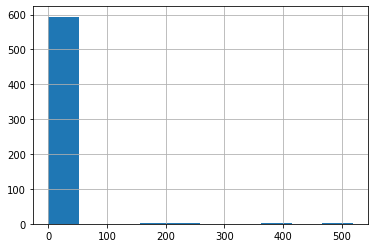

In [7]:
TCGA_tpm_without_uniqueiso.iloc[:,4].hist()

In [8]:
TCGA_tpm_without_uniqueiso_log2p.iloc[:,:5].describe()

rownames,ENST00000452544,ENST00000444816,ENST00000527677,ENST00000444643,ENST00000502905
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.193119,1.073355,1.417380,0.072398,1.938378
std,0.331259,0.903135,1.180086,0.174698,1.004677
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.081633,0.285278,0.500924,0.000000,1.341568
50%,0.126739,0.986049,1.159918,0.000000,1.827305
75%,0.190995,1.617964,2.072266,0.000000,2.369603
max,2.904068,4.498481,6.404714,1.503690,9.022337


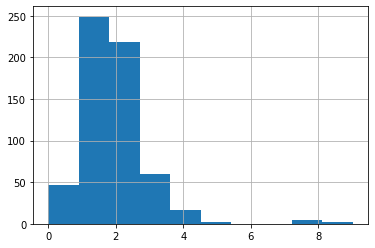

In [9]:
TCGA_tpm_without_uniqueiso_log2p.iloc[:,4].hist()

In [10]:
np.array(TCGA_tpm_without_uniqueiso_log2p).max()

18.168211801797717

In [11]:
print(TCGA_tpm_gn_RBPs.shape, TCGA_tpm_gn.shape, TCGA_tpm_without_uniqueiso.shape, getBM.shape)

(600, 1279) (600, 60554) (600, 162429) (162429, 5)
